In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Crear un circuito cuántico con 2 qubits
n = 2
grover_circuit = QuantumCircuit(n)


In [2]:
# Aplicar una serie de puertas Hadamard para preparar el estado inicial
for qubit in range(n):
    grover_circuit.h(qubit)

# Definir el oráculo (marcar la entrada deseada, por ejemplo, 01)
marked_element = '01'
for i, bit in enumerate(reversed(marked_element)):
    if bit == '1':
        grover_circuit.z(i)

# Inversión de amplitud promedio
for qubit in range(n):
    grover_circuit.h(qubit)
    grover_circuit.z(qubit)

# Iteraciones de Grover (en este ejemplo, 1 iteración)
for qubit in range(n):
    grover_circuit.h(qubit)
    grover_circuit.z(qubit)



In [3]:
# Medir los qubits
grover_circuit.measure_all()


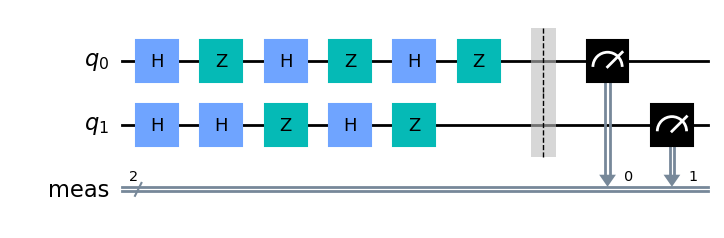

In [4]:
grover_circuit.draw(output='mpl')

In [5]:
# Ejecutar el circuito en un simulador
simulator = Aer.get_backend('qasm_simulator')
job = execute(grover_circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()


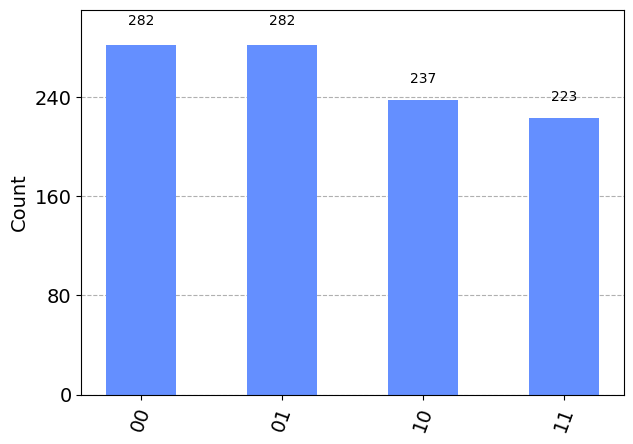

In [6]:
# Mostrar el resultado
plot_histogram(counts)